In [28]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix
import numpy as np
from mlxtend.plotting import heatmap
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [41]:
#pull the data
df = pd.read_csv('rest_review_data_cleaned.csv')

In [42]:
df.head()

,Review,Liked
0,"['wow', 'love', 'place']",1
1,"['crust', 'good']",0
2,"['tasti', 'textur', 'nasti']",0
3,"['stop', 'late', 'may', 'bank', 'holiday', 'ri...",1
4,"['select', 'menu', 'great', 'price']",1


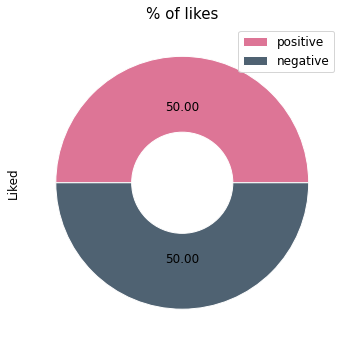

In [43]:
#Donut chart
colors = ['#DD7596','#4F6272']
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.Liked.value_counts().head(3).plot(kind='pie', labels=None, autopct='%.2f', ax=ax1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors).legend(labels={
                     "positive",
                     "negative"})
central_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('% of likes', size=15)
plt.tight_layout()
plt.savefig('images/donut_chart.png', dpi=300)
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [45]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

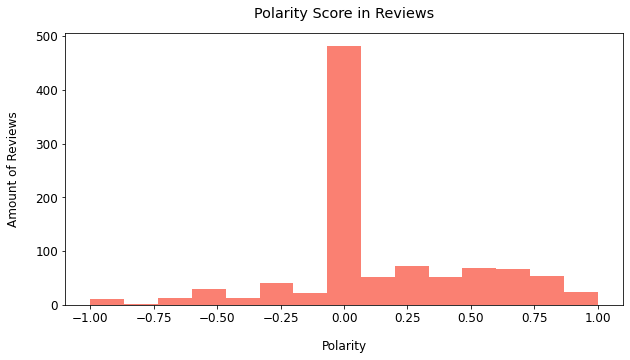

In [46]:
#Polarity scores
df["Polarity"] = df["Review"].map(lambda Text: TextBlob(Text).sentiment.polarity)
df["Polarity"].plot(kind = "hist", bins = 15, linewidth = 1, color = "salmon", figsize = (10,5))

plt.title("Polarity Score in Reviews", pad = 15)
plt.xlabel("Polarity", labelpad = 15)

plt.ylabel("Amount of Reviews", labelpad = 15)
plt.savefig('images/polarity_score.png', dpi=300)
plt.show()

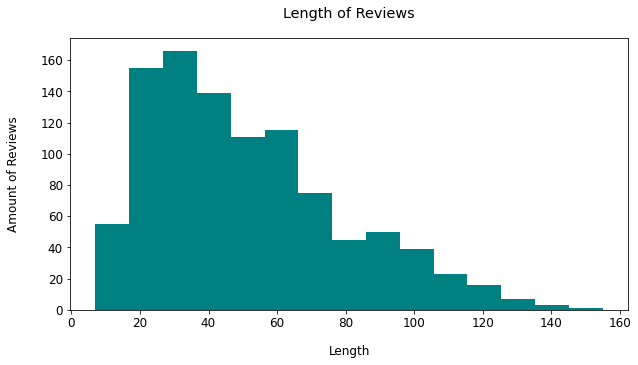

In [47]:
#Length of reviews
df["Length"] = df["Review"].astype(str).apply(len)
df["Length"].plot(kind = "hist", bins = 15, linewidth = 1, color = "teal", figsize = (10,5))
plt.title("Length of Reviews", pad = 20)
plt.xlabel("Length", labelpad = 15)
plt.ylabel("Amount of Reviews",labelpad = 20)
plt.savefig('images/length_of_reviews.png', dpi=300)
plt.show()

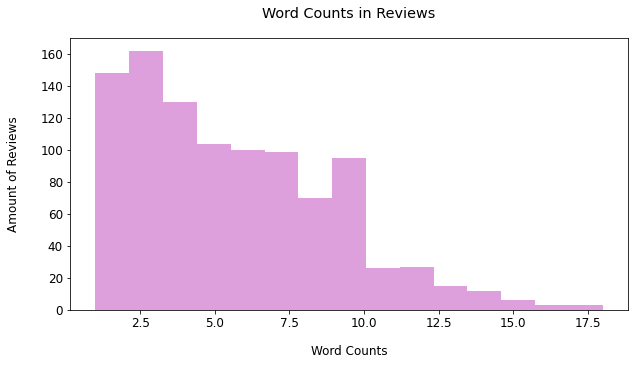

In [50]:
#Word counts
df["Word Counts"] = df["Review"].apply(lambda x: len(str(x).split()))
df["Word Counts"].plot(kind = "hist", bins = 15, linewidth = 1, color = "plum", figsize = (10,5))
plt.title("Word Counts in Reviews", pad = 20)
plt.xlabel("Word Counts", labelpad = 15)
plt.ylabel("Amount of Reviews", labelpad = 20)
plt.savefig('images/word_counts.png', dpi=300)
plt.show()

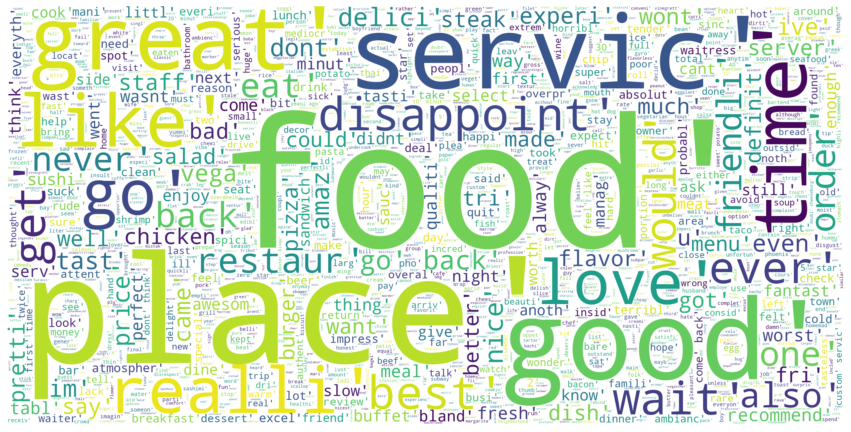

In [53]:
#WordCloud
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])
wc= WordCloud(background_color="white",random_state=1, max_words=2000, width = 3000, height = 1500, stopwords = Stopwords).generate(' '.join(df['Review']))
plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.savefig('images/wordcloud.png', dpi=300)
plt.show()

In [61]:
#N-Gram Analysis
def Gram_Analysis(Corpus, Gram, N):
    
  # Vectorizer
    Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
    ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
    Count = ngrams.sum(axis=0)

  # List of Words
    words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
    words = sorted(words, key = lambda x:x[1], reverse = True)
    
    return words[:N]

In [62]:
#Unigrams
#Positive Reviews

# Finding 2-gram
df_positive = df[df["Liked"] == "1"].dropna()
words_p = Gram_Analysis(df_positive["Review"], 2, 5)
Bigram = pd.DataFrame(words_p, columns = ["Words", "Counts"])

# Visualization
color_p=['#DD7596']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_p, figsize = (10, 5))
plt.title("2-gram of Reviews with Positive Reviews", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Total Counts", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", fontsize = 15, labelpad = 20)
plt.savefig('images/p_2gram.png', dpi=300)
plt.show()

ValueError: empty vocabulary; perhaps the documents only contain stop words